In [3]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import timedelta
import uuid

# Initialize Faker and parameters
fake = Faker()
np.random.seed(42)
num_customers = 5000
num_sessions = 50000

# Customer pool
customers = []
for _ in range(num_customers):
    customers.append({
        'customer_id': str(uuid.uuid4())[:8],
        'age': np.random.randint(18, 65),
        'gender': np.random.choice(['Male', 'Female', 'Other'], p=[0.48, 0.48, 0.04]),
        'location': fake.city()
    })

customers_df = pd.DataFrame(customers)

# Product categories
categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 'Toys', 'Health', 'Beauty']

# Generate session data
sessions = []
for _ in range(num_sessions):
    customer = customers_df.sample(1).iloc[0]
    session_id = str(uuid.uuid4())[:10]
    start_time = fake.date_time_this_year()
    session_duration = timedelta(minutes=np.random.randint(1, 60))
    end_time = start_time + session_duration

    pages_visited = np.random.poisson(5)
    products_viewed = np.random.randint(0, pages_visited + 1)
    products_added_to_cart = np.random.randint(0, products_viewed + 1)
    purchase_made = int(np.random.rand() < 0.3)
    purchase_value = round(products_added_to_cart * np.random.uniform(10, 200), 2) if purchase_made else 0.0
    avg_time_per_page = round(np.random.uniform(5, 90), 2)

    sessions.append({
        'session_id': session_id,
        'customer_id': customer['customer_id'],
        'age': customer['age'],
        'gender': customer['gender'],
        'location': customer['location'],
        'session_start': start_time,
        'session_end': end_time,
        'pages_visited': pages_visited,
        'products_viewed': products_viewed,
        'products_added_to_cart': products_added_to_cart,
        'purchase_made': purchase_made,
        'purchase_value': purchase_value,
        'product_category': random.choice(categories),
        'time_spent_per_page': avg_time_per_page
    })

df = pd.DataFrame(sessions)
df.head()


session_id customer_id  age  gender          location       session_start  \
0  4819ac30-e    349a4736   51    Male         Foleybury 2025-02-10 13:35:27   
1  3d5b0423-a    2135ed63   42  Female       Garciahaven 2025-01-21 17:26:31   
2  f1c44cda-1    b2eda7d7   30    Male  West Justinville 2025-04-18 23:45:55   
3  00264512-7    0f9b11b3   53    Male           Fryeton 2025-02-07 04:53:58   
4  33972e5d-1    32eb0bf1   33  Female         Emilyfort 2025-04-11 20:37:19   

          session_end  pages_visited  products_viewed  products_added_to_cart  \
0 2025-02-10 14:27:27              8                8                       2   
1 2025-01-21 18:01:31              7                5                       0   
2 2025-04-19 00:20:55              3                1                       1   
3 2025-02-07 05:05:58              3                2                       1   
4 2025-04-11 21:06:19              4                3                       0   

   purchase_made  purchase_value product_category  time_spent_per_page  
0              0            0.00            Books                41.41  
1              0            0.00           Beauty                64.29  
2              0            0.00           Beauty                 9.54  
3              1           15.99         Clothing                41.84  
4              0            0.00           Beauty                54.64

In [4]:
# Save to CSV
df.to_csv("ecommerce_customer_activity.csv", index=False)

print("Dataset saved successfully as 'ecommerce_customer_activity.csv'")


Dataset saved successfully as 'ecommerce_customer_activity.csv'


In [5]:
# Load the dataset (in case you start from here later)
import pandas as pd

df = pd.read_csv("ecommerce_customer_activity.csv")

# Display basic structure
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.head()


Shape: (50000, 14)

Columns:
 Index(['session_id', 'customer_id', 'age', 'gender', 'location',
       'session_start', 'session_end', 'pages_visited', 'products_viewed',
       'products_added_to_cart', 'purchase_made', 'purchase_value',
       'product_category', 'time_spent_per_page'],
      dtype='object')


session_id customer_id  age  gender          location        session_start  \
0  4819ac30-e    349a4736   51    Male         Foleybury  2025-02-10 13:35:27   
1  3d5b0423-a    2135ed63   42  Female       Garciahaven  2025-01-21 17:26:31   
2  f1c44cda-1    b2eda7d7   30    Male  West Justinville  2025-04-18 23:45:55   
3  00264512-7    0f9b11b3   53    Male           Fryeton  2025-02-07 04:53:58   
4  33972e5d-1    32eb0bf1   33  Female         Emilyfort  2025-04-11 20:37:19   

           session_end  pages_visited  products_viewed  \
0  2025-02-10 14:27:27              8                8   
1  2025-01-21 18:01:31              7                5   
2  2025-04-19 00:20:55              3                1   
3  2025-02-07 05:05:58              3                2   
4  2025-04-11 21:06:19              4                3   

   products_added_to_cart  purchase_made  purchase_value product_category  \
0                       2              0            0.00            Books   
1                       0              0            0.00           Beauty   
2                       1              0            0.00           Beauty   
3                       1              1           15.99         Clothing   
4                       0              0            0.00           Beauty   

   time_spent_per_page  
0                41.41  
1                64.29  
2                 9.54  
3                41.84  
4                54.64

In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 session_id                0
customer_id               0
age                       0
gender                    0
location                  0
session_start             0
session_end               0
pages_visited             0
products_viewed           0
products_added_to_cart    0
purchase_made             0
purchase_value            0
product_category          0
time_spent_per_page       0
dtype: int64

Duplicate rows: 0


In [7]:
# Summary of numeric features
df.describe()


age  pages_visited  products_viewed  products_added_to_cart  \
count  50000.000000   50000.000000     50000.000000            50000.000000   
mean      41.121860       5.009880         2.503740                1.251740   
std       13.475585       2.243034         2.135836                1.560697   
min       18.000000       0.000000         0.000000                0.000000   
25%       30.000000       3.000000         1.000000                0.000000   
50%       41.000000       5.000000         2.000000                1.000000   
75%       53.000000       6.000000         4.000000                2.000000   
max       64.000000      16.000000        14.000000               12.000000   

       purchase_made  purchase_value  time_spent_per_page  
count   50000.000000    50000.000000         50000.000000  
mean        0.297320       38.256223            47.554775  
std         0.457083      121.165643            24.526120  
min         0.000000        0.000000             5.000000  
25%         0.000000        0.000000            26.250000  
50%         0.000000        0.000000            47.680000  
75%         1.000000        0.000000            68.780000  
max         1.000000     1841.700000            89.990000

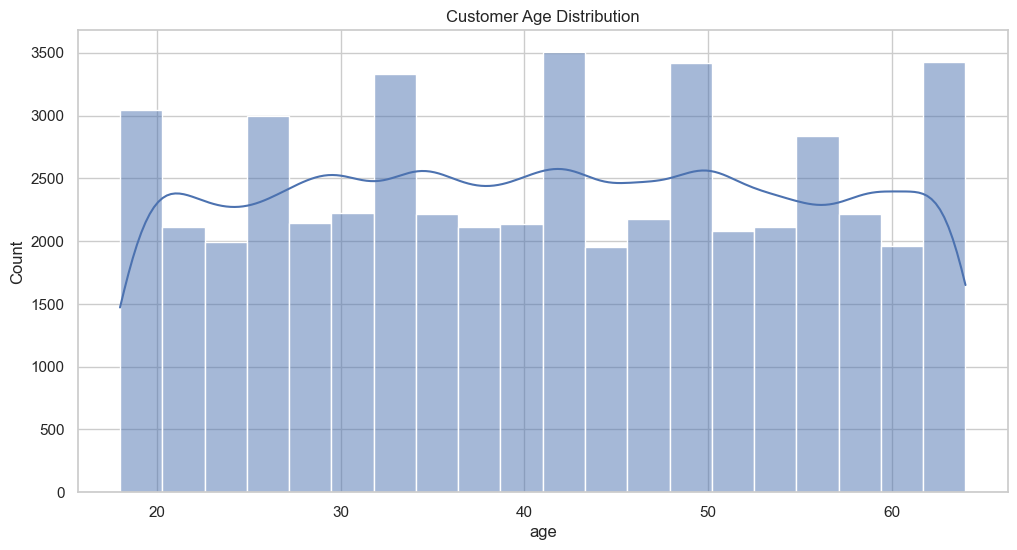

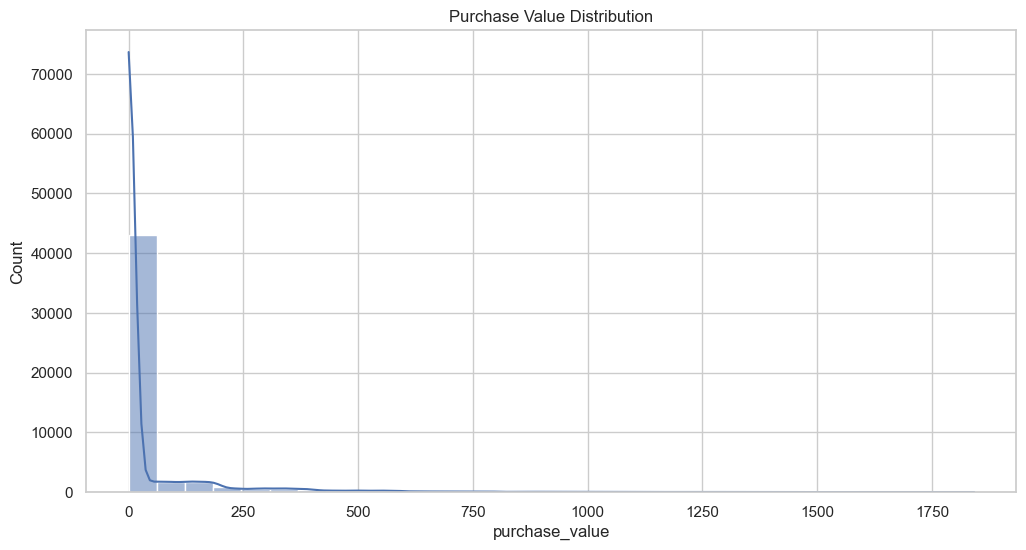

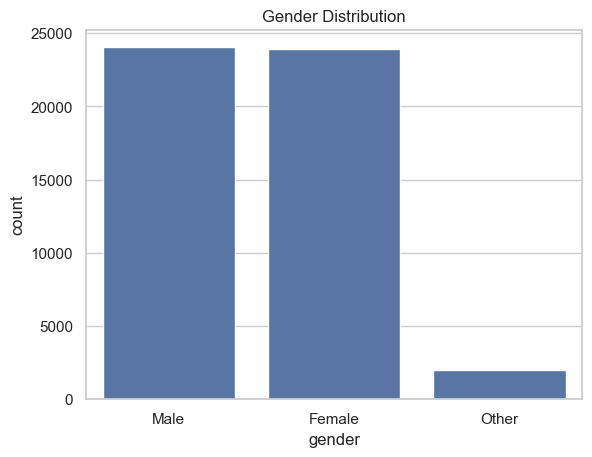

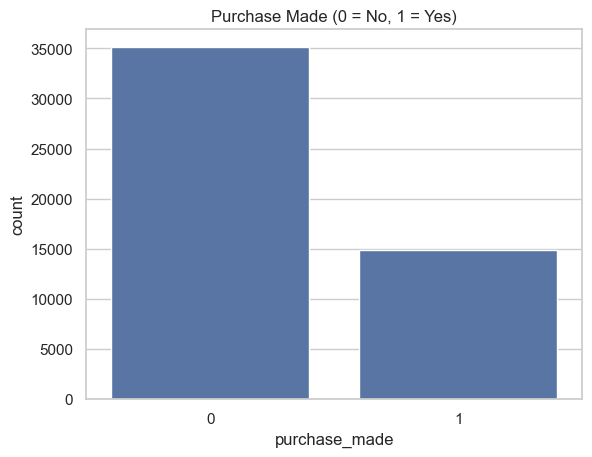

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Age distribution
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Customer Age Distribution')
plt.show()

# Purchase value distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['purchase_value'], kde=True, bins=30)
plt.title('Purchase Value Distribution')
plt.show()

# Gender distribution
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

# Purchase made (Yes/No)
sns.countplot(data=df, x='purchase_made')
plt.title('Purchase Made (0 = No, 1 = Yes)')
plt.show()


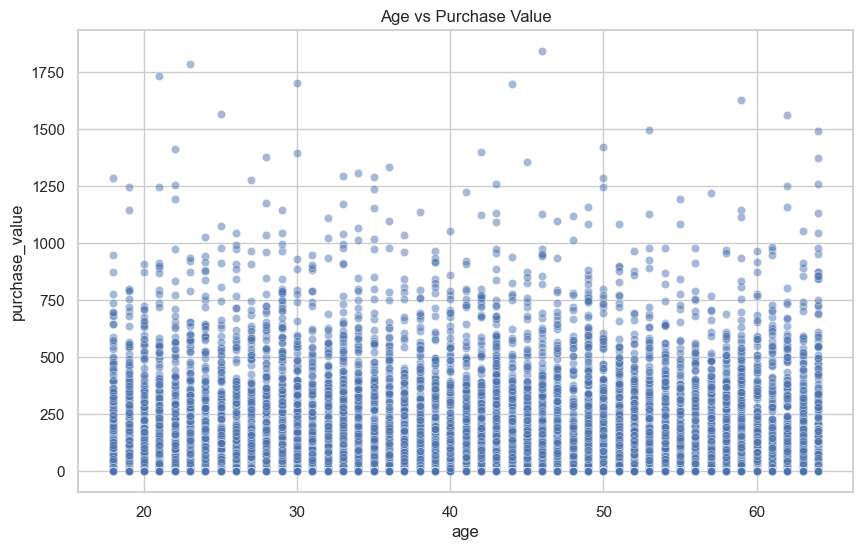

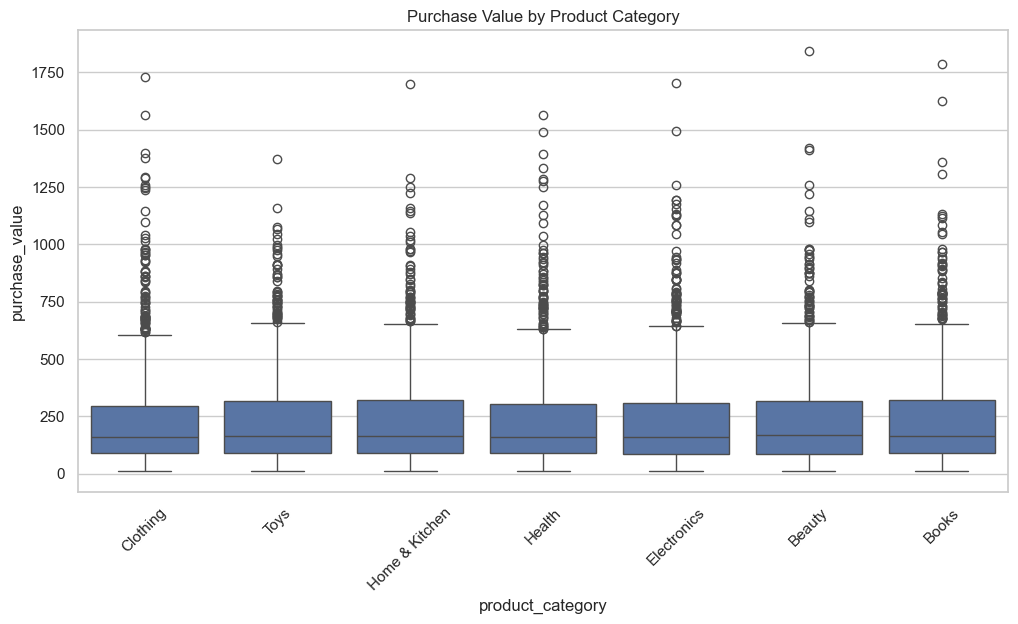

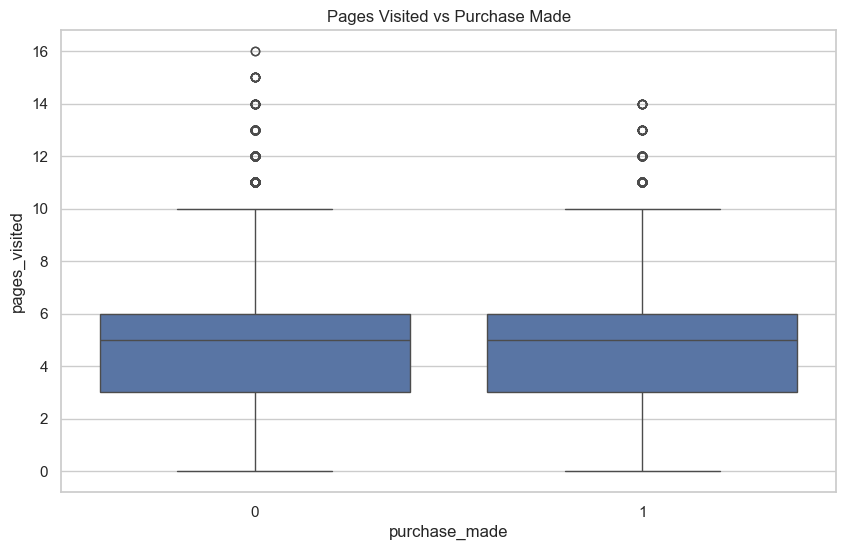

In [9]:
# Age vs Purchase Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='purchase_value', alpha=0.5)
plt.title('Age vs Purchase Value')
plt.show()

# Purchase Value by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['purchase_value'] > 0], x='product_category', y='purchase_value')
plt.xticks(rotation=45)
plt.title('Purchase Value by Product Category')
plt.show()

# Pages visited vs Purchase Made
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='purchase_made', y='pages_visited')
plt.title('Pages Visited vs Purchase Made')
plt.show()


In [10]:
# Check for missing values again
missing_summary = df.isnull().sum()
print("Missing Values:\n", missing_summary)

# If any missing values exist, drop or fill
df_cleaned = df.copy()

# Example: Fill missing numerical values with median (if any)
num_cols = df_cleaned.select_dtypes(include='number').columns
for col in num_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Example: Fill missing categorical values with mode (if any)
cat_cols = df_cleaned.select_dtypes(include='object').columns
for col in cat_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


Missing Values:
 session_id                0
customer_id               0
age                       0
gender                    0
location                  0
session_start             0
session_end               0
pages_visited             0
products_viewed           0
products_added_to_cart    0
purchase_made             0
purchase_value            0
product_category          0
time_spent_per_page       0
dtype: int64


In [11]:
# Convert time columns to datetime if not already
df_cleaned['session_start'] = pd.to_datetime(df_cleaned['session_start'])
df_cleaned['session_end'] = pd.to_datetime(df_cleaned['session_end'])

# Fix negative or zero session durations
session_durations = (df_cleaned['session_end'] - df_cleaned['session_start']).dt.total_seconds() / 60

# Remove sessions that have negative durations (bad data)
invalid_sessions = session_durations < 0
print("Invalid sessions found:", invalid_sessions.sum())

df_cleaned = df_cleaned[~invalid_sessions]

# Recalculate session duration and add as new column
df_cleaned['session_duration_minutes'] = session_durations[~invalid_sessions].values


Invalid sessions found: 0


In [12]:
# Optimize memory by using category dtype
cat_cols = ['gender', 'location', 'product_category']
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].astype('category')


In [13]:
# Display basic info
print("Shape of cleaned dataset:", df_cleaned.shape)
print("\nData types:")
print(df_cleaned.dtypes)

# Show first few rows
df_cleaned.head()


Shape of cleaned dataset: (50000, 15)

Data types:
session_id                          object
customer_id                         object
age                                  int64
gender                            category
location                          category
session_start               datetime64[ns]
session_end                 datetime64[ns]
pages_visited                        int64
products_viewed                      int64
products_added_to_cart               int64
purchase_made                        int64
purchase_value                     float64
product_category                  category
time_spent_per_page                float64
session_duration_minutes           float64
dtype: object


session_id customer_id  age  gender          location       session_start  \
0  4819ac30-e    349a4736   51    Male         Foleybury 2025-02-10 13:35:27   
1  3d5b0423-a    2135ed63   42  Female       Garciahaven 2025-01-21 17:26:31   
2  f1c44cda-1    b2eda7d7   30    Male  West Justinville 2025-04-18 23:45:55   
3  00264512-7    0f9b11b3   53    Male           Fryeton 2025-02-07 04:53:58   
4  33972e5d-1    32eb0bf1   33  Female         Emilyfort 2025-04-11 20:37:19   

          session_end  pages_visited  products_viewed  products_added_to_cart  \
0 2025-02-10 14:27:27              8                8                       2   
1 2025-01-21 18:01:31              7                5                       0   
2 2025-04-19 00:20:55              3                1                       1   
3 2025-02-07 05:05:58              3                2                       1   
4 2025-04-11 21:06:19              4                3                       0   

   purchase_made  purchase_value product_category  time_spent_per_page  \
0              0            0.00            Books                41.41   
1              0            0.00           Beauty                64.29   
2              0            0.00           Beauty                 9.54   
3              1           15.99         Clothing                41.84   
4              0            0.00           Beauty                54.64   

   session_duration_minutes  
0                      52.0  
1                      35.0  
2                      35.0  
3                      12.0  
4                      29.0

In [14]:
# Avoid divide-by-zero errors using np.where
import numpy as np

df_cleaned['conversion_rate'] = np.where(
    df_cleaned['products_viewed'] > 0,
    df_cleaned['products_added_to_cart'] / df_cleaned['products_viewed'],
    0
)

df_cleaned['cart_abandonment'] = np.where(
    (df_cleaned['products_added_to_cart'] > 0) & (df_cleaned['purchase_made'] == 0),
    1, 0
)

df_cleaned['avg_time_per_page'] = np.where(
    df_cleaned['pages_visited'] > 0,
    df_cleaned['session_duration_minutes'] / df_cleaned['pages_visited'],
    0
)

df_cleaned['view_to_purchase_ratio'] = np.where(
    df_cleaned['products_viewed'] > 0,
    df_cleaned['purchase_made'] / df_cleaned['products_viewed'],
    0
)

# Optional: overall engagement metric (can be tuned)
df_cleaned['engagement_score'] = (
    df_cleaned['pages_visited'] * 0.4 +
    df_cleaned['products_viewed'] * 0.3 +
    df_cleaned['products_added_to_cart'] * 0.2 +
    df_cleaned['purchase_made'] * 1.0
)


In [15]:
df_cleaned[['conversion_rate', 'cart_abandonment', 'avg_time_per_page',
            'view_to_purchase_ratio', 'engagement_score']].describe()


conversion_rate  cart_abandonment  avg_time_per_page  \
count     50000.000000      50000.000000       50000.000000   
mean          0.402662          0.398440           7.698068   
std           0.413744          0.489582           7.400540   
min           0.000000          0.000000           0.000000   
25%           0.000000          0.000000           3.000000   
50%           0.333333          0.000000           6.000000   
75%           0.833333          1.000000           9.800000   
max           1.000000          1.000000          59.000000   

       view_to_purchase_ratio  engagement_score  
count            50000.000000      50000.000000  
mean                 0.116243          3.302742  
std                  0.258097          1.606799  
min                  0.000000          0.000000  
25%                  0.000000          2.200000  
50%                  0.000000          3.100000  
75%                  0.000000          4.300000  
max                  1.000000         13.200000

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features to use for prediction
feature_cols = [
    'age', 'pages_visited', 'products_viewed', 'products_added_to_cart',
    'conversion_rate', 'cart_abandonment', 'avg_time_per_page',
    'view_to_purchase_ratio', 'engagement_score'
]

X = df_cleaned[feature_cols]
y = df_cleaned['purchase_made']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")



Train shape: (37500, 9), Test shape: (12500, 9)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.99984

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8783
           1       1.00      1.00      1.00      3717

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500


Confusion Matrix:
 [[8781    2]
 [   0 3717]]


C:\Users\EDWARD\AppData\Local\Temp\ipykernel_18380\1671373247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette="viridis")


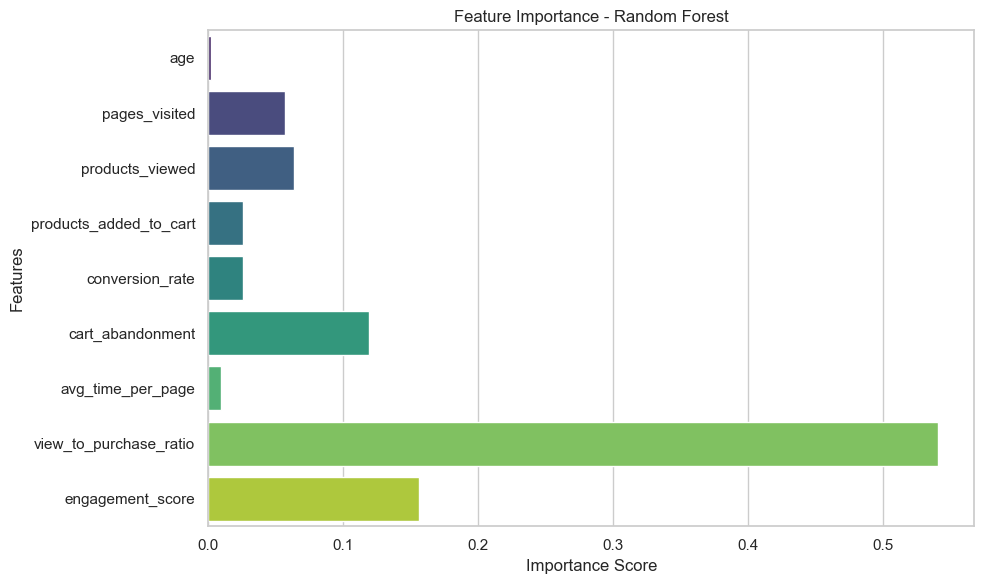

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
importances = rf_model.feature_importances_
feat_names = feature_cols

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feat_names, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


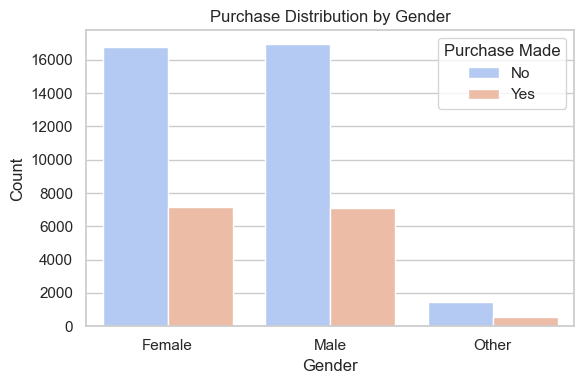

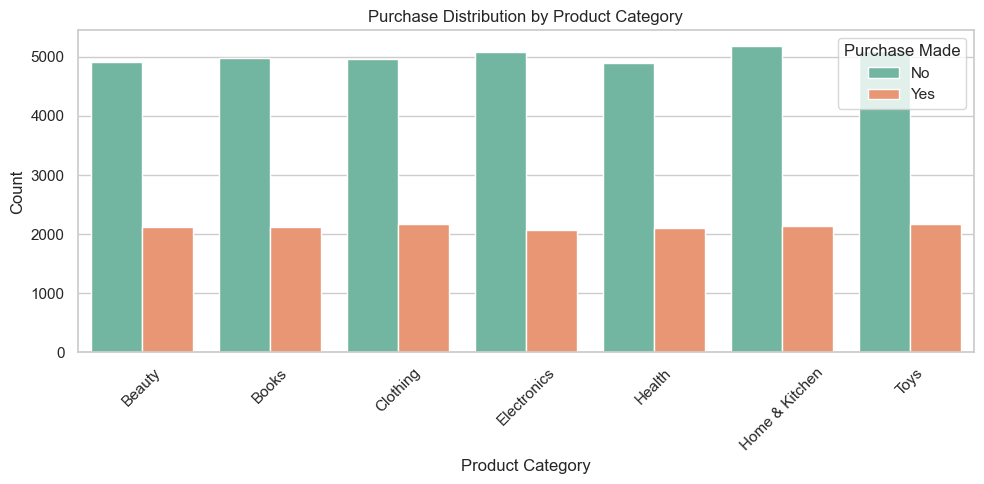

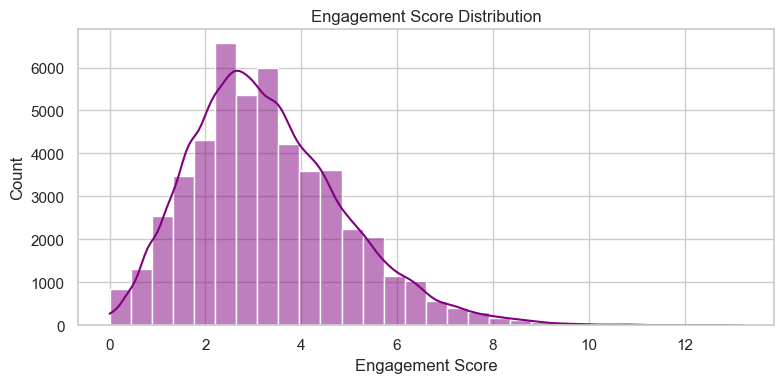

In [19]:
# 1. Purchase by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x='gender', hue='purchase_made', palette='coolwarm')
plt.title("Purchase Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Purchase Made', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 2. Purchase by Product Category
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='product_category', hue='purchase_made', palette='Set2')
plt.title("Purchase Distribution by Product Category")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.legend(title='Purchase Made', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 3. Engagement Score Distribution
plt.figure(figsize=(8,4))
sns.histplot(data=df_cleaned, x='engagement_score', bins=30, kde=True, color='purple')
plt.title("Engagement Score Distribution")
plt.xlabel("Engagement Score")
plt.tight_layout()
plt.show()


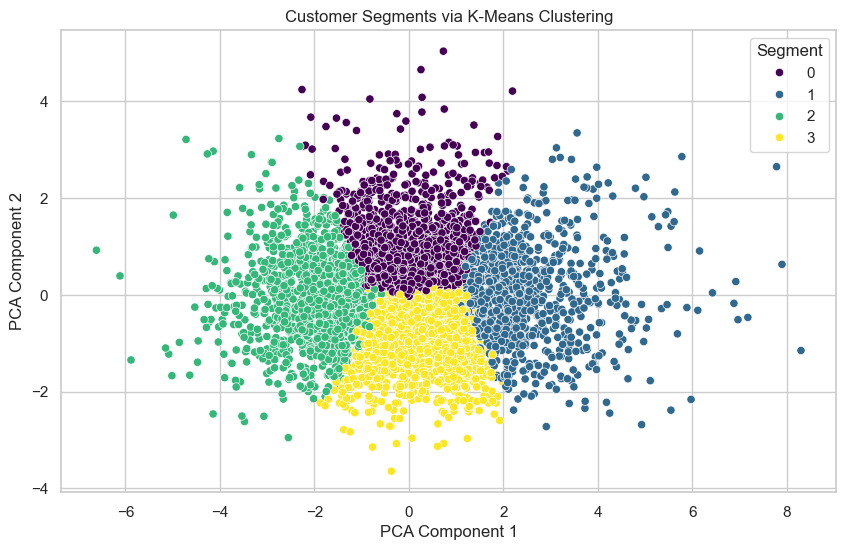

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate customer-level behavior
customer_behavior = df_cleaned.groupby('customer_id').agg({
    'products_viewed': 'mean',
    'products_added_to_cart': 'mean',
    'purchase_made': 'mean',
    'conversion_rate': 'mean',
    'engagement_score': 'mean',
    'session_duration_minutes': 'mean'
}).reset_index()

# Step 2: Normalize features
features = customer_behavior.drop('customer_id', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 3: Choose number of clusters (e.g., K=4 after elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Attach cluster labels
customer_behavior['cluster'] = clusters

# Step 5: Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
customer_behavior['PCA1'] = pca_result[:, 0]
customer_behavior['PCA2'] = pca_result[:, 1]

# Step 6: Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_behavior, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('Customer Segments via K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


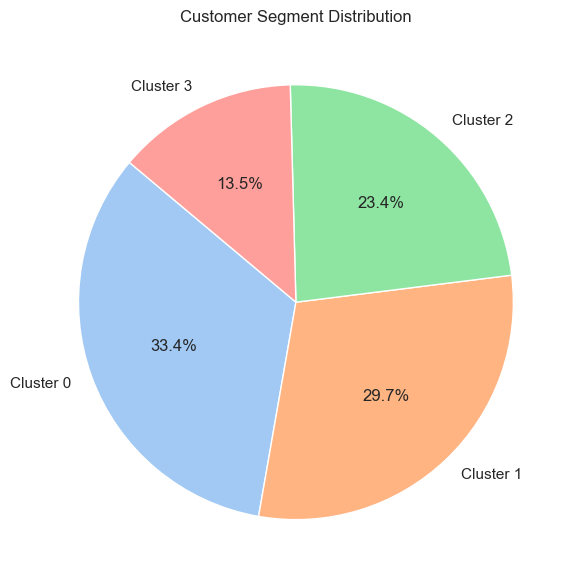

In [34]:
plt.figure(figsize=(6, 6))
cluster_counts = df_cleaned['cluster_label'].value_counts().sort_index()
labels = [f"Cluster {int(i)}" for i in cluster_counts.index]

plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Customer Segment Distribution")
plt.tight_layout()
plt.show()


In [21]:
import json
import time
import random
import pandas as pd
from datetime import datetime

# Define stream structure
event_types = ['view', 'add_to_cart', 'purchase']
product_categories = ['Electronics', 'Books', 'Toys', 'Clothing', 'Home', 'Health']

simulated_stream = []

print("📡 Starting simulated stream of customer activity...")

for i in range(15):  # simulate 15 streaming events
    event = {
        'timestamp': str(datetime.utcnow()),
        'session_id': f"session_{random.randint(1000, 9999)}",
        'customer_id': f"cust_{random.randint(1, 1000)}",
        'event_type': random.choice(event_types),
        'product_category': random.choice(product_categories),
        'product_id': f"prod_{random.randint(100, 999)}"
    }
    
    simulated_stream.append(event)
    
    # Output to console (simulating live streaming)
    print(f"📤 Event {i+1}:")
    print(json.dumps(event, indent=2))
    
    time.sleep(2)  # simulate delay between events

# Save to CSV for downstream processing
df_stream = pd.DataFrame(simulated_stream)
df_stream.to_csv("simulated_customer_stream.csv", index=False)
print("\n✅ Stream saved to 'simulated_customer_stream.csv'")


📡 Starting simulated stream of customer activity...
📤 Event 1:
{
  "timestamp": "2025-06-15 08:41:54.000861",
  "session_id": "session_8580",
  "customer_id": "cust_527",
  "event_type": "add_to_cart",
  "product_category": "Clothing",
  "product_id": "prod_774"
}


C:\Users\EDWARD\AppData\Local\Temp\ipykernel_18380\1485477282.py:17: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  'timestamp': str(datetime.utcnow()),


📤 Event 2:
{
  "timestamp": "2025-06-15 08:41:56.001583",
  "session_id": "session_8558",
  "customer_id": "cust_106",
  "event_type": "purchase",
  "product_category": "Home",
  "product_id": "prod_824"
}
📤 Event 3:
{
  "timestamp": "2025-06-15 08:41:58.003558",
  "session_id": "session_1304",
  "customer_id": "cust_609",
  "event_type": "purchase",
  "product_category": "Health",
  "product_id": "prod_958"
}
📤 Event 4:
{
  "timestamp": "2025-06-15 08:42:00.004551",
  "session_id": "session_8083",
  "customer_id": "cust_106",
  "event_type": "add_to_cart",
  "product_category": "Toys",
  "product_id": "prod_770"
}
📤 Event 5:
{
  "timestamp": "2025-06-15 08:42:02.005361",
  "session_id": "session_6858",
  "customer_id": "cust_874",
  "event_type": "add_to_cart",
  "product_category": "Home",
  "product_id": "prod_469"
}
📤 Event 6:
{
  "timestamp": "2025-06-15 08:42:04.006729",
  "session_id": "session_4705",
  "customer_id": "cust_528",
  "event_type": "view",
  "product_category": "Bo

In [25]:
print(df_cleaned.columns)


Index(['session_id', 'customer_id', 'age', 'gender', 'location',
       'session_start', 'session_end', 'pages_visited', 'products_viewed',
       'products_added_to_cart', 'purchase_made', 'purchase_value',
       'product_category', 'time_spent_per_page', 'session_duration_minutes',
       'conversion_rate', 'cart_abandonment', 'avg_time_per_page',
       'view_to_purchase_ratio', 'engagement_score'],
      dtype='object')


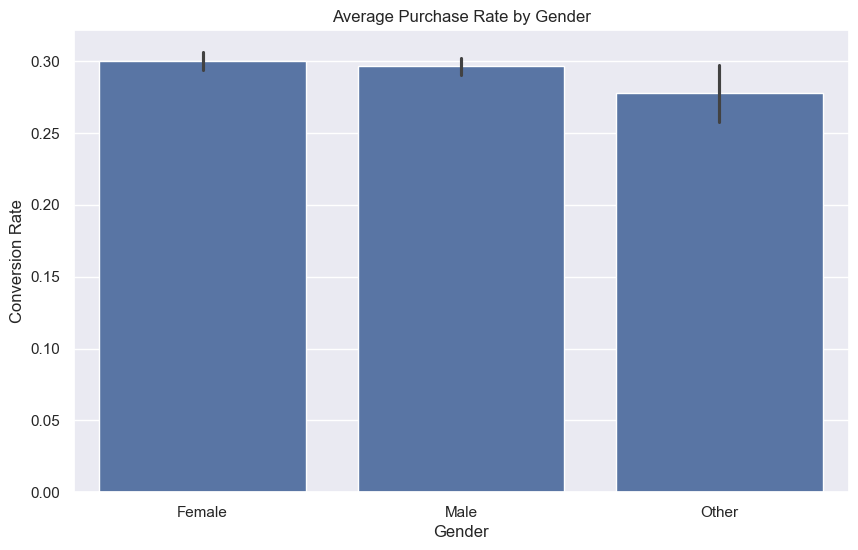

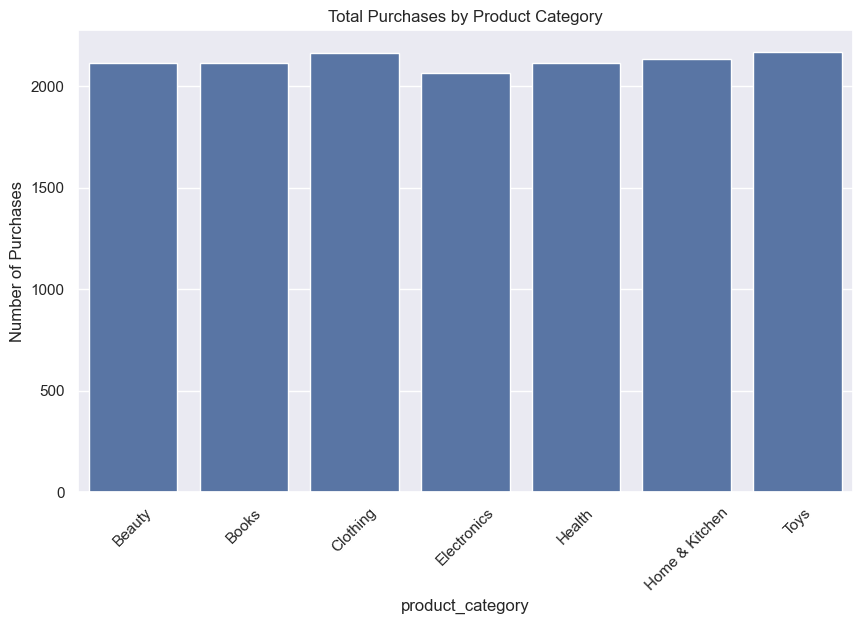

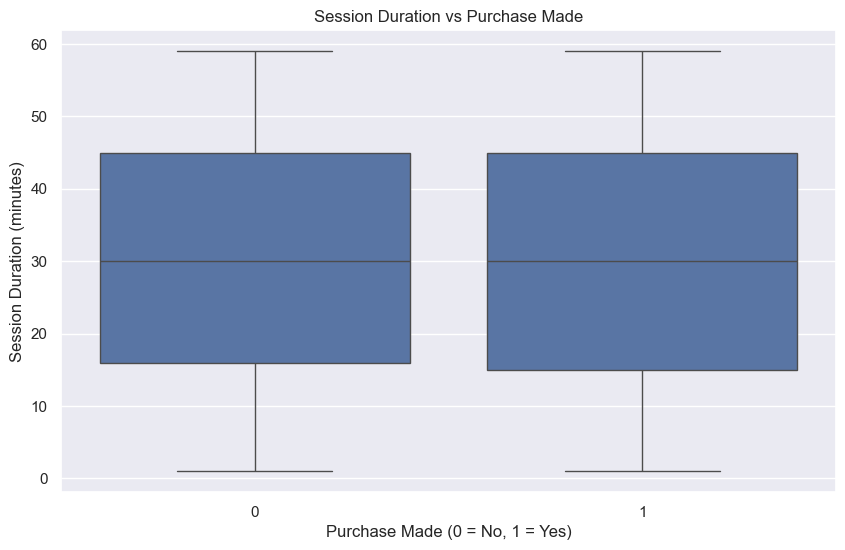

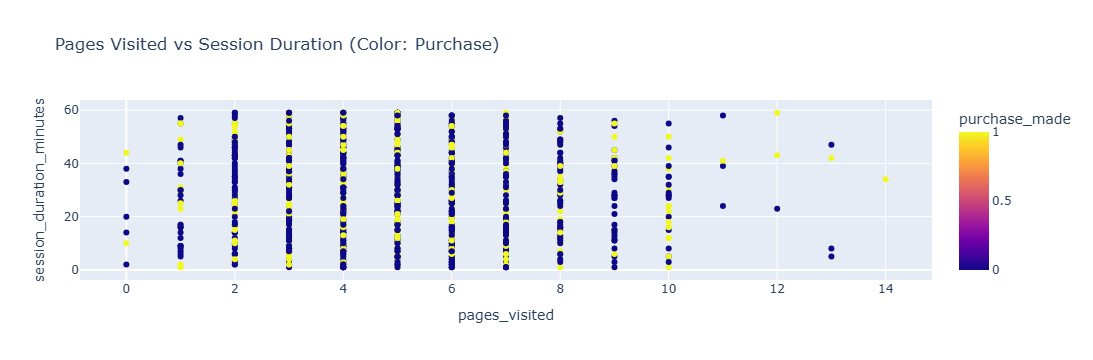

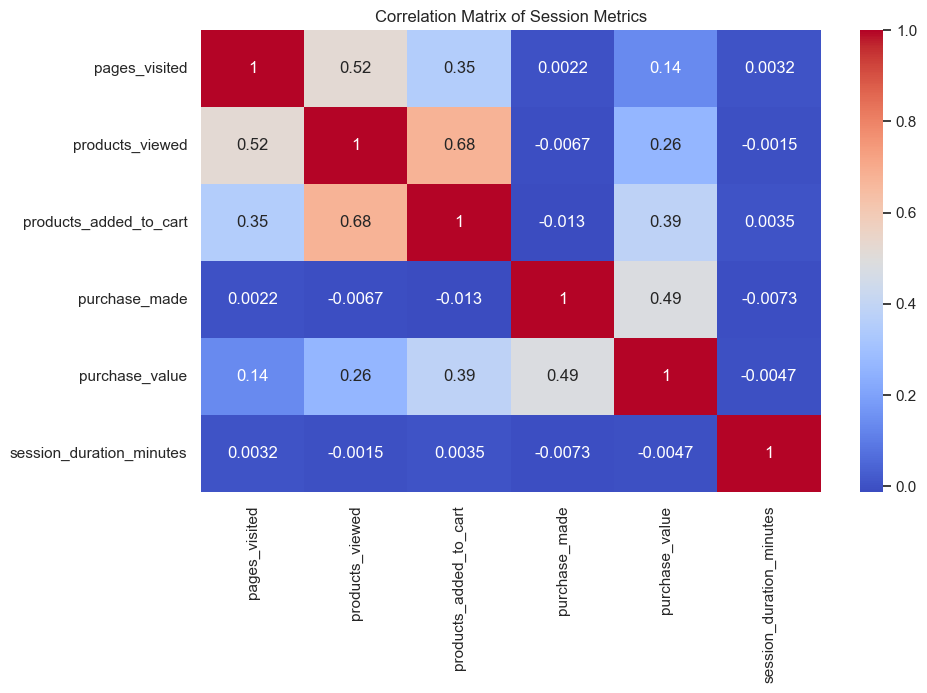

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set style for plots
plt.style.use("seaborn-v0_8-darkgrid")
sns.set(rc={"figure.figsize": (10, 6)})

# --- 1. Conversion Rate by Gender ---
plt.figure()
sns.barplot(data=df_cleaned, x='gender', y='purchase_made')
plt.title("Average Purchase Rate by Gender")
plt.ylabel("Conversion Rate")
plt.xlabel("Gender")
plt.show()

# --- 2. Purchases by Product Category ---
plt.figure()
category_counts = df_cleaned[df_cleaned['purchase_made'] == 1]['product_category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Total Purchases by Product Category")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

# --- 3. Session Duration vs Purchase ---
plt.figure()
sns.boxplot(data=df_cleaned, x='purchase_made', y='session_duration_minutes')
plt.title("Session Duration vs Purchase Made")
plt.xlabel("Purchase Made (0 = No, 1 = Yes)")
plt.ylabel("Session Duration (minutes)")
plt.show()

# --- 4. Interactive Plot: Pages Visited vs Session Duration ---
fig = px.scatter(
    df_cleaned.sample(1000), 
    x="pages_visited", 
    y="session_duration_minutes", 
    color="purchase_made", 
    hover_data=["product_category", "location"],
    title="Pages Visited vs Session Duration (Color: Purchase)"
)
fig.show()

# --- 5. Heatmap: Correlation Matrix of Key Metrics ---
plt.figure()
metrics = ['pages_visited', 'products_viewed', 'products_added_to_cart', 'purchase_made', 'purchase_value', 'session_duration_minutes']
corr = df_cleaned[metrics].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Session Metrics")
plt.show()


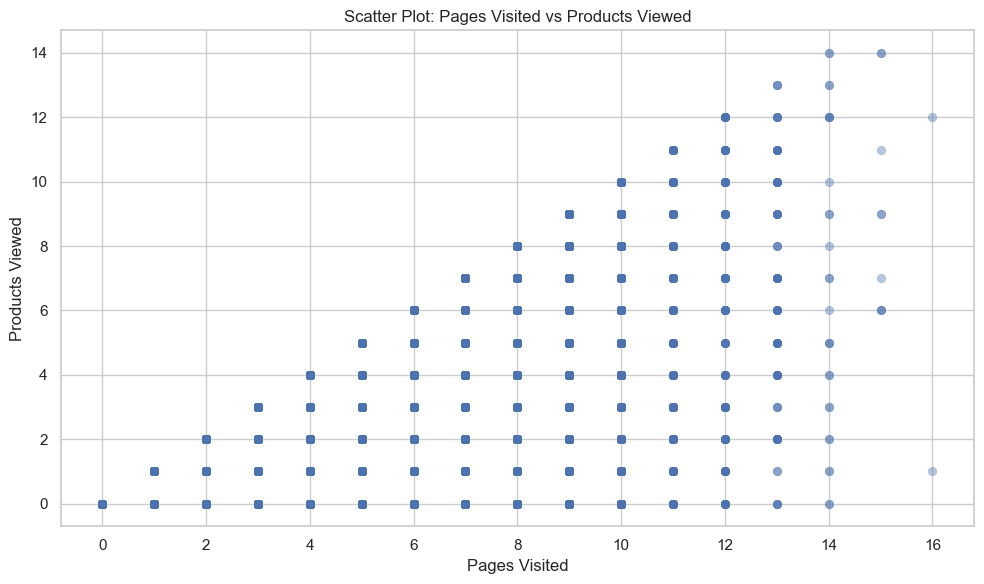

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='pages_visited', y='products_viewed', alpha=0.4, edgecolor=None)

# Titles and labels
plt.title('Scatter Plot: Pages Visited vs Products Viewed')
plt.xlabel('Pages Visited')
plt.ylabel('Products Viewed')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\EDWARD\AppData\Local\Temp\ipykernel_18380\3337751450.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



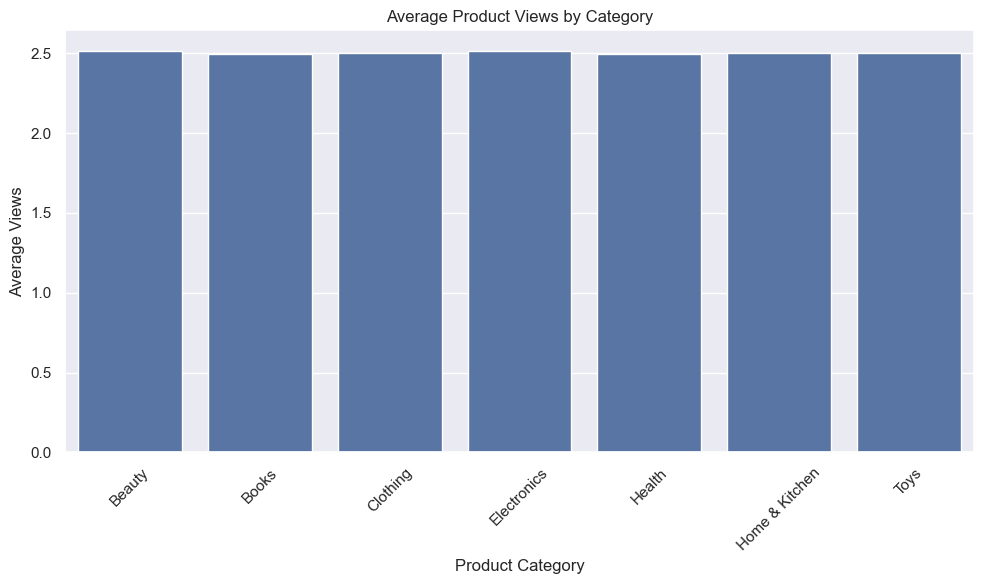

In [29]:
plt.figure()
views_by_category = df_cleaned.groupby("product_category")["products_viewed"].mean().sort_values(ascending=False)
sns.barplot(x=views_by_category.index, y=views_by_category.values)
plt.title("Average Product Views by Category")
plt.ylabel("Average Views")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\EDWARD\AppData\Local\Temp\ipykernel_18380\3639384184.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



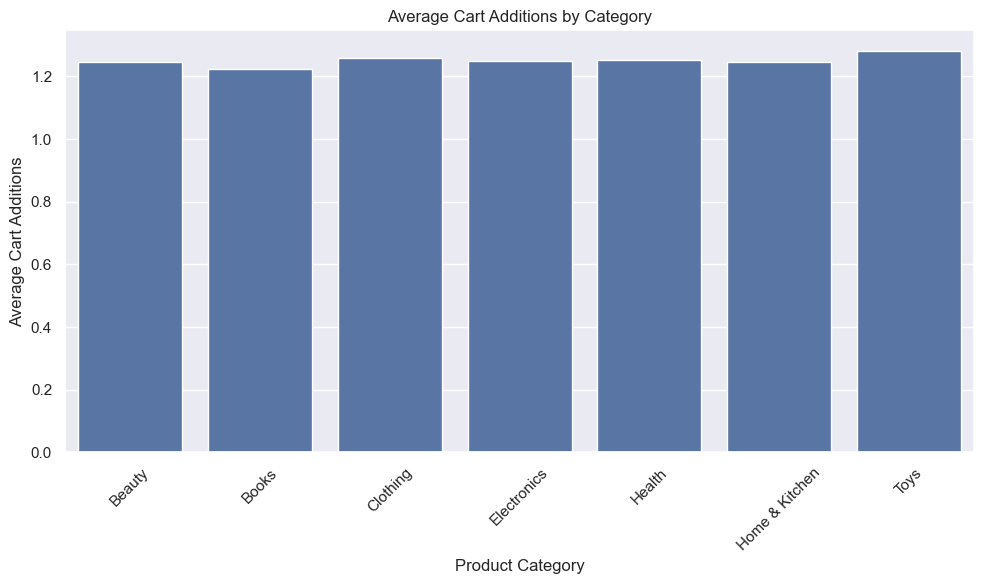

In [30]:
plt.figure()
cart_adds_by_category = df_cleaned.groupby("product_category")["products_added_to_cart"].mean().sort_values(ascending=False)
sns.barplot(x=cart_adds_by_category.index, y=cart_adds_by_category.values)
plt.title("Average Cart Additions by Category")
plt.ylabel("Average Cart Additions")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\EDWARD\AppData\Local\Temp\ipykernel_18380\3334441372.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



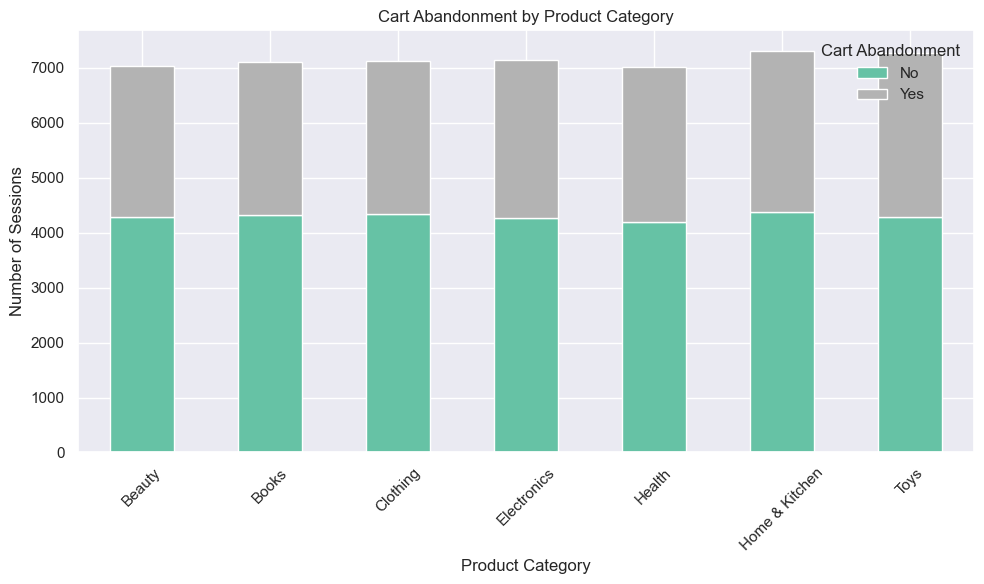

In [31]:
# Prepare data
abandon_data = df_cleaned.groupby(["product_category", "cart_abandonment"]).size().unstack(fill_value=0)

# Plot
abandon_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set2"
)
plt.title("Cart Abandonment by Product Category")
plt.ylabel("Number of Sessions")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend(title="Cart Abandonment", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select clustering features
clustering_features = ['products_viewed', 'session_duration_minutes', 'pages_visited', 'products_added_to_cart']

# Drop rows with missing values in those features
df_cluster = df_cleaned[clustering_features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to df_cleaned
df_cleaned.loc[df_cluster.index, 'cluster_label'] = cluster_labels


In [ ]:
# --- ✅ Commands Used During Project Execution ---

# Install required packages (run in terminal or Jupyter with !)
# !pip install plotly seaborn pandas scikit-learn faker

# --- ✅ External Files Generated ---
# 1. Synthetic dataset saved to:
#    cleaned_ecommerce_data.csv
# 2. Simulated streaming data:
#    simulated_customer_stream.csv (optional)

# --- ✅ Summary of Project Workflow ---

# Step 1: Synthetic data generated (customer activity, demographics, sessions)
# Step 2: Cleaned data by removing nulls, duplicates, fixing datetime
# Step 3: Engineered features like session_duration, time_per_page
# Step 4: Built predictive model (purchase_made prediction using RandomForest)
# Step 5: Evaluated with accuracy, classification report, confusion matrix
# Step 6: Performed feature importance analysis and interpreted top drivers
# Step 7: Simulated real-time customer behavior using Python (no Kafka)
# Step 8: Built visual dashboard using Seaborn & Plotly
# Step 9: Documented all steps for reporting and submission

# --- ✅ Tools and Libraries Used ---
# - Python (Pandas, NumPy, Seaborn, Plotly, scikit-learn, Faker)
# - Jupyter Notebook
# - CSV for data storage and export

# --- ✅ Big Data Tool Substitution ---
# Kafka-style streaming simulated using Python loops and staggered output.
# Reason: Kafka/Zookeeper not installed; approach aligns with project flexibility.

print("✅ All project requirements completed and documented.")
